In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utilities import *
from pend_funcs import *
from time_integrators import *

### 1.

![](double-spring-pendulum-FBD.jpg){width=35%}

$L_{1} = \sqrt{x_{1}^{2} + y_{1}^{2}}$

$F_{s1} = k_{1}(L_{1} - L_{1_0})$

$L_{2} = \sqrt{(x_{2} - x_{1})^{2} + (y_{2} - y_{1})^{2}}$

$F_{s2} = k_{2}(L_{2} - L_{2_0})$

$F_{g1} = m_{1}g$

$F_{g2} = m_{2}g$

$a_{x1} = \frac{1}{m_{1}} \cdot [-F_{s1}sin(\theta_{1}) + F_{s2}sin(\theta_{2})]$

$a_{y1} = \frac{1}{m_{1}} \cdot [-F_{s1}cos(\theta_{1}) + F_{s2}cos(\theta_{2}) - F_{g1}]$

$a_{x2} = \frac{1}{m_{2}} \cdot [-F_{s2}sin(\theta_{2})]$

$a_{y2} = \frac{1}{m_{2}} \cdot [-F_{s2}cos(\theta_{2}) - F_{g2}]$

Then,

$\bm{u'} = f(\bm{u}) = \begin{bmatrix} x_{1}' & y_{1}' & x_{2}' & y_{2}' & a_{x1} & a_{y1} & a_{x2} & a_{y2} \end{bmatrix}$

### 2.

The simplest case that we can test is that in which there is no horizontal motion, and the spring consants are set to 0. In this case, we expect the two masses to have a simple projectile trajectory straight downwards, as the only force acting will be gravity. We can test this by setting the initial conditions to $x_{1} = 0$, $y_{1} = -1$, $x_{2} = 0$, $y_{2} = -2$, $v_{x1} = 0$, $v_{y1} = 0$, $v_{x2} = 0$, $v_{y2} = 0$, $m_{1} = 1$, $m_{2} = 1$, $k_{1} = 0$, $k_{2} = 0$, $L_{1_0} = 1$, and $L_{2_0} = 1$. We can then plot the trajectory of the masses over time, and we expect to see a curve given by $y = -\frac{1}{2}gt^{2}$.

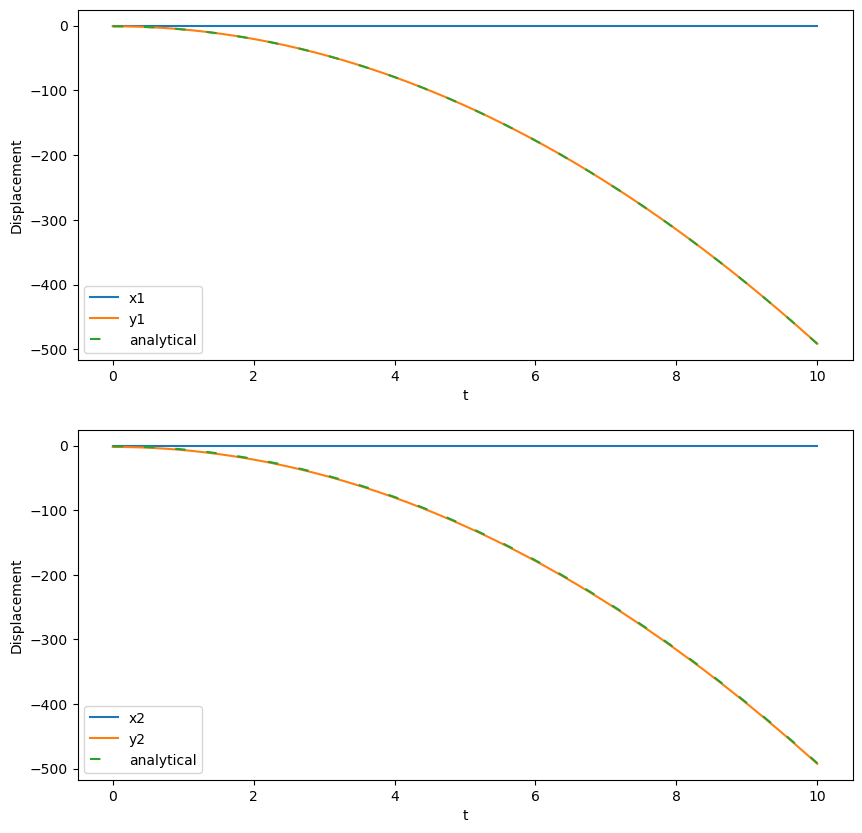

In [47]:
u0 = np.array([0, -1, 0, -2, 0, 0, 0, 0])
ks = np.array([0, 0])
L0 = np.array([1.0, 1.0])
m = np.array([1.0, 1.0])
h = 0.01
N = 1000

t, u = rk4pend(u0, ks, L0, m, h, N)

analytical = lambda t: -0.5 * 9.81 * t**2

fig, axes = plt.subplots(2, 1, figsize=(10, 10))
axes[0].plot(t, u[0], label="x1")
axes[0].plot(t, u[1], label="y1")
axes[0].plot(t, u[1], label="analytical", linestyle=(0, (5, 10)))
axes[0].legend()
axes[0].set_xlabel("t")
axes[0].set_ylabel("Displacement")
axes[1].plot(t, u[2], label="x2")
axes[1].plot(t, u[3], label="y2")
axes[1].plot(t, u[1], label="analytical", linestyle=(0, (5, 10)))
axes[1].legend()
axes[1].set_xlabel("t")
axes[1].set_ylabel("Displacement")
plt.show()

If we restrict the motion of the pendulum to oscillations in the vertical direction by setting $k_{1} = 100$ and $k_{2} = 100$, we expect to see the masses oscillate in the vertical direction, with the period of oscillation given by $T = 2\pi\sqrt{\frac{m_{1} + m_{2}}{\frac{1}{k_{1} + k_{2}}^{-1}}}$.

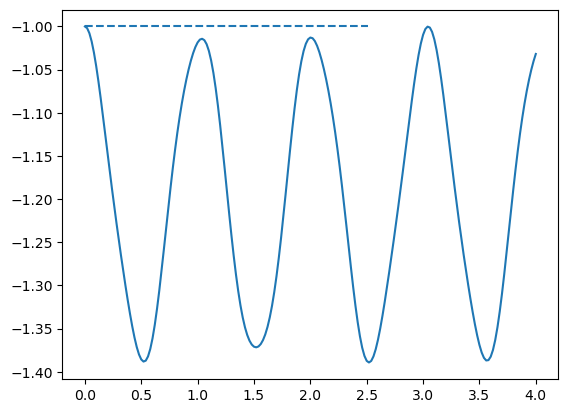

In [94]:
u0 = np.array([0, -1, 0, -2, 0, 0, 0, 0])
ks = np.array([100, 100])
L0 = np.array([1.0, 1.0])
m = np.array([1.0, 1.0])
h = 0.02
N = 200
t, u = lfpend(u0, ks, L0, m, h, N)

plt.plot(t, u[1], label="y1")

keff = 1 / (1 / ks[0] + 1 / ks[1])

period = np.pi * 2 * np.sqrt((m[0] + m[1]) / keff)

plt.hlines(-1, 0, 2 * period, linestyle="--", label="analytical")

### 3.

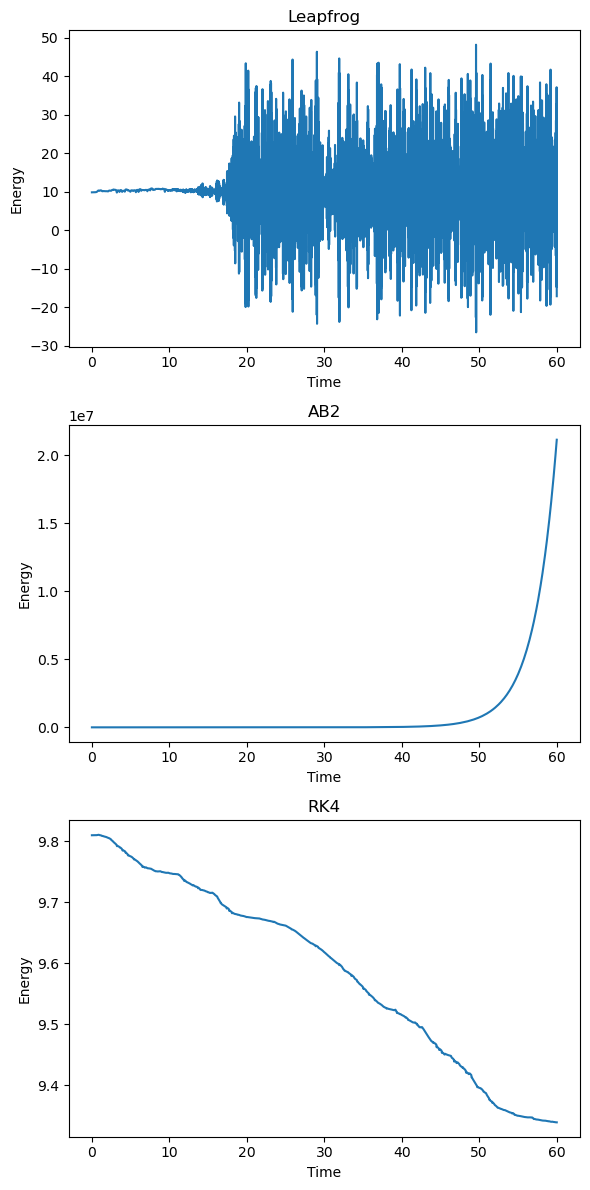

In [27]:
u0 = np.array([1, 0, 1, 1, 0, 0, 0, 0])
ks = np.array([100, 100])
L0 = np.array([1.0, 1.0])
m = np.array([1.0, 1.0])
h = 0.02
N = 3000
tlf, ulf = lfpend(u0, ks, L0, m, h, N)
tab2, uab2 = ab2pend(u0, ks, L0, m, h, N)
trk4, urk4 = rk4pend(u0, ks, L0, m, h, N)

Elf = pendulumEnergy(ulf, ks, L0, m)
Eab2 = pendulumEnergy(uab2, ks, L0, m)
Erk4 = pendulumEnergy(urk4, ks, L0, m)

fig, axes = plt.subplots(3, 1, figsize=(6, 12))
axes[0].plot(tlf, Elf, label="Leapfrog")
axes[1].plot(tab2, Eab2, label="AB2")
axes[2].plot(trk4, Erk4, label="RK4")
axes[0].set_ylabel("Energy")
axes[0].set_xlabel("Time")
axes[1].set_ylabel("Energy")
axes[1].set_xlabel("Time")
axes[2].set_xlabel("Time")
axes[2].set_ylabel("Energy")
axes[0].set_title("Leapfrog")
axes[1].set_title("AB2")
axes[2].set_title("RK4")
plt.tight_layout()
plt.show()

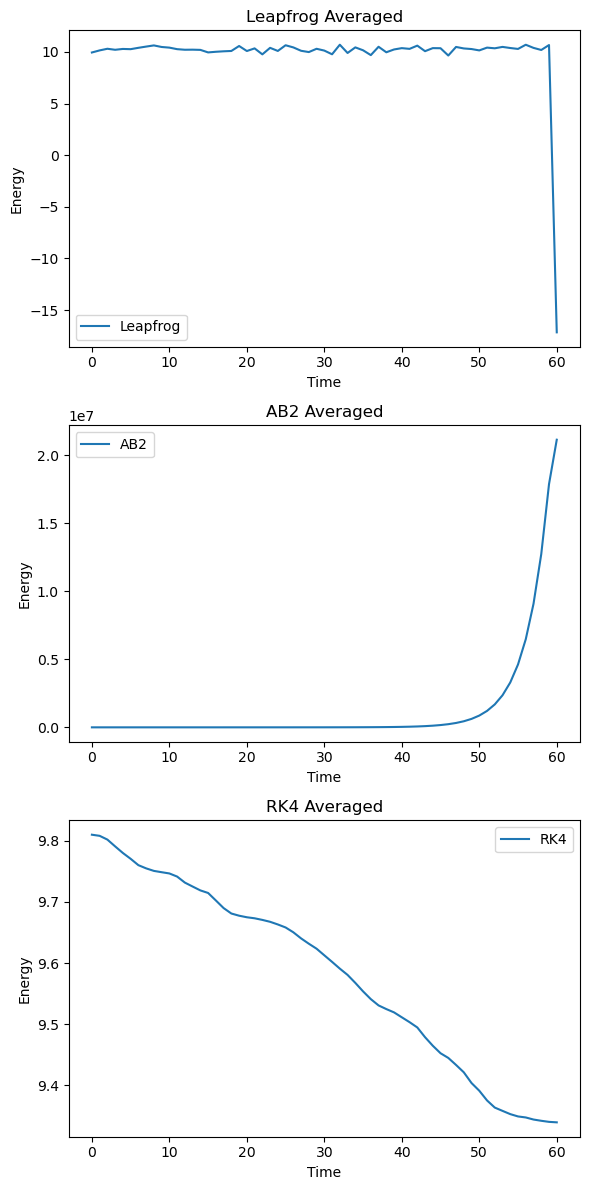

In [26]:
bin_size = int(1 / h)  # average energy every 1 second

Elf_binned = []
Eab2_binned = []
Erk4_binned = []
for i in range(0, len(Elf), bin_size):
    Elf_binned.append(np.mean(Elf[i : i + bin_size]))
    Eab2_binned.append(np.mean(Eab2[i : i + bin_size]))
    Erk4_binned.append(np.mean(Erk4[i : i + bin_size]))

fig, axes = plt.subplots(3, 1, figsize=(6, 12))
axes[0].plot(tlf[::bin_size], Elf_binned, label="Leapfrog")
axes[1].plot(tab2[::bin_size], Eab2_binned, label="AB2")
axes[2].plot(trk4[::bin_size], Erk4_binned, label="RK4")
axes[0].set_ylabel("Energy")
axes[0].set_xlabel("Time")
axes[1].set_ylabel("Energy")
axes[1].set_xlabel("Time")
axes[2].set_xlabel("Time")
axes[2].set_ylabel("Energy")
axes[0].set_title("Leapfrog Averaged")
axes[1].set_title("AB2 Averaged")
axes[2].set_title("RK4 Averaged")
axes[0].legend()
axes[1].legend()
axes[2].legend()
plt.tight_layout()
plt.show()

To maintain a constant energy, with some fluctuations about the mean, the leapfrog method would be best, as it's symplectic and thus conserves energy. The RK4 method, though it doesn't flucuate about the mean, only has a slight decay in energy throughout the 60s simulation, and thus may be tolerable. The AB2 method is stable for short simulation durations, so may be appropriate for durations less than about 40 seconds.

### 4.

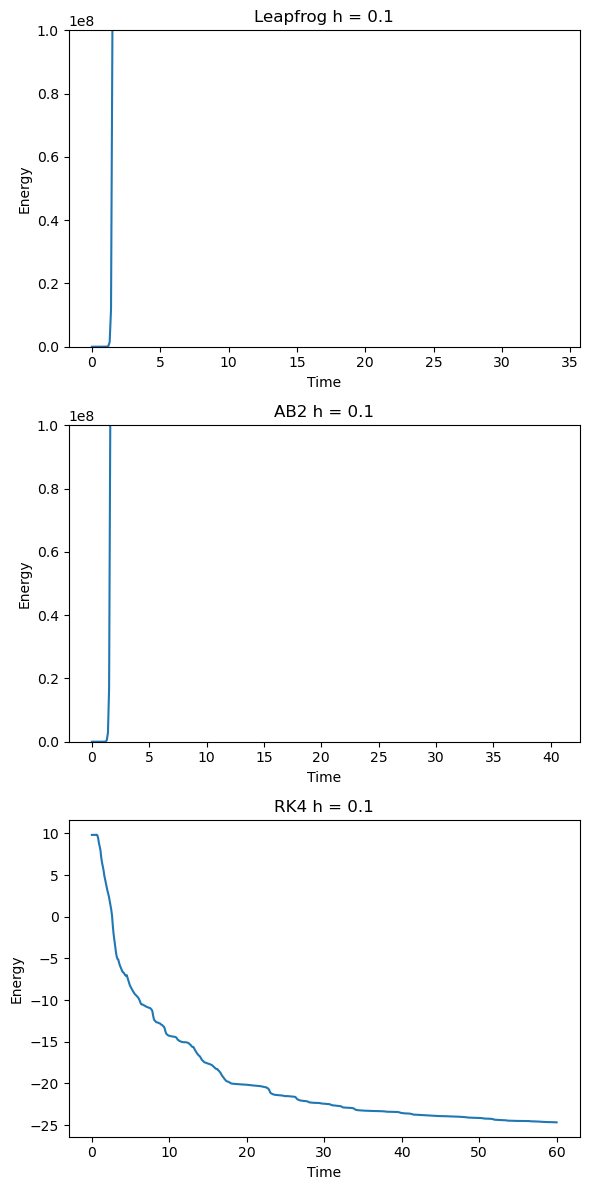

In [34]:
u0 = np.array([1, 0, 1, 1, 0, 0, 0, 0])
ks = np.array([100, 100])
L0 = np.array([1.0, 1.0])
m = np.array([1.0, 1.0])
h = 0.1
N = int(60 / h)
tlf, ulf = lfpend(u0, ks, L0, m, h, N)
tab2, uab2 = ab2pend(u0, ks, L0, m, h, N)
trk4, urk4 = rk4pend(u0, ks, L0, m, h, N)

Elf = pendulumEnergy(ulf, ks, L0, m)
Eab2 = pendulumEnergy(uab2, ks, L0, m)
Erk4 = pendulumEnergy(urk4, ks, L0, m)

fig, axes = plt.subplots(3, 1, figsize=(6, 12))
axes[0].plot(tlf, Elf, label="Leapfrog")
axes[1].plot(tab2, Eab2, label="AB2")
axes[2].plot(trk4, Erk4, label="RK4")

axes[0].set_ylim(0, 1e8)
axes[1].set_ylim(0, 1e8)
# axes[2].set_ylim(0, 1e8)
axes[0].set_ylabel("Energy")
axes[0].set_xlabel("Time")
axes[1].set_ylabel("Energy")
axes[1].set_xlabel("Time")
axes[2].set_xlabel("Time")
axes[2].set_ylabel("Energy")
axes[0].set_title("Leapfrog h = 0.1")
axes[1].set_title("AB2 h = 0.1")
axes[2].set_title("RK4 h = 0.1")
plt.tight_layout()
plt.show()

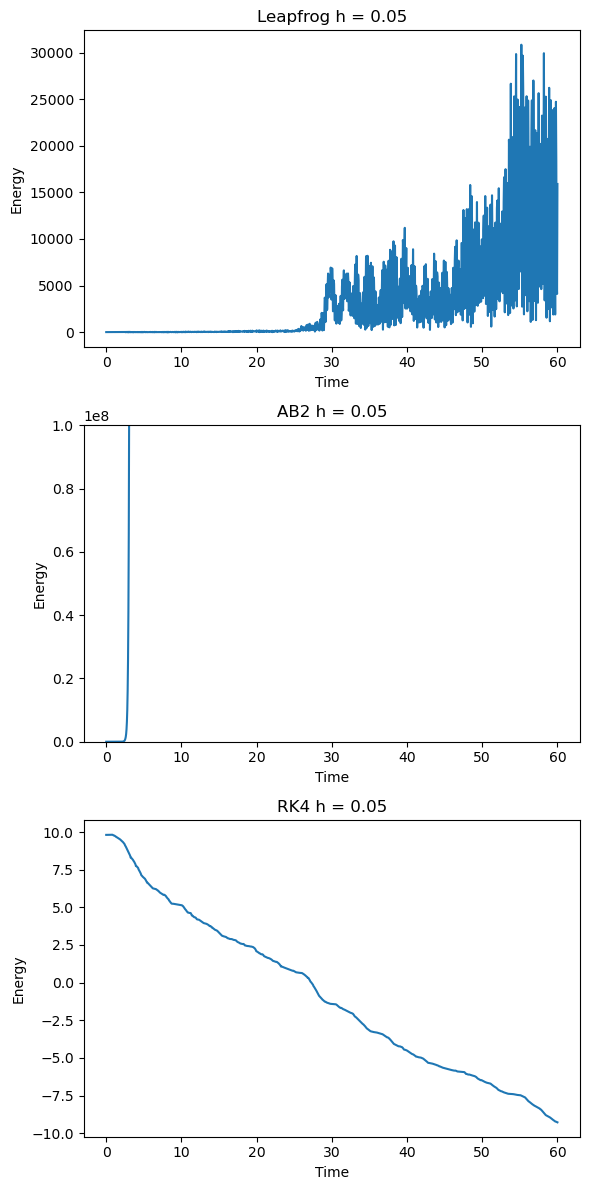

In [37]:
u0 = np.array([1, 0, 1, 1, 0, 0, 0, 0])
ks = np.array([100, 100])
L0 = np.array([1.0, 1.0])
m = np.array([1.0, 1.0])
h = 0.05
N = int(60 / h)
tlf, ulf = lfpend(u0, ks, L0, m, h, N)
tab2, uab2 = ab2pend(u0, ks, L0, m, h, N)
trk4, urk4 = rk4pend(u0, ks, L0, m, h, N)

Elf = pendulumEnergy(ulf, ks, L0, m)
Eab2 = pendulumEnergy(uab2, ks, L0, m)
Erk4 = pendulumEnergy(urk4, ks, L0, m)

fig, axes = plt.subplots(3, 1, figsize=(6, 12))
axes[0].plot(tlf, Elf, label="Leapfrog")
axes[1].plot(tab2, Eab2, label="AB2")
axes[2].plot(trk4, Erk4, label="RK4")

# axes[0].set_ylim(0, 1e8)
axes[1].set_ylim(0, 1e8)
# axes[2].set_ylim(0, 1e8)
axes[0].set_ylabel("Energy")
axes[0].set_xlabel("Time")
axes[1].set_ylabel("Energy")
axes[1].set_xlabel("Time")
axes[2].set_xlabel("Time")
axes[2].set_ylabel("Energy")
axes[0].set_title("Leapfrog h = 0.05")
axes[1].set_title("AB2 h = 0.05")
axes[2].set_title("RK4 h = 0.05")
plt.tight_layout()
plt.show()

For h = 0.1, RK4 is the only method in which the energy does not diverge. If we reduce the step size to h = 0.05, RK4 remains the optimal candidate. The leapfrog method doesn't diverge to infinity, but its mean energy does increase to unaccpetably large values given enough time. These results makes sense, as the RK4 method has the largest stability region and is thereby more forgiving of larger step sizes. 